## 1. 载入数据

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from  sklearn.datasets  import  make_hastie_10_2
from  sklearn.ensemble  import  GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
##载入示例数据 10维度

X, y = make_hastie_10_2(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)##test_size测试集合所占比例

## 默认GBDT参数

In [0]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1] 
print ("AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre)) 

AUC Score : 0.974248
Accuracy : 0.8995


## 默认XGBoost参数

In [0]:
auc_Score=[]
accuracy=[]
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1] 
print ("AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre))
auc_Score.append(metrics.roc_auc_score(y_test, y_pro))
accuracy.append(metrics.accuracy_score(y_test, y_pre))

AUC Score : 0.972424
Accuracy : 0.8993


## 分步调整XGBoost参数

In [0]:
clf = XGBClassifier(
 learning_rate =0.1, #默认0.3
 n_estimators=100, #树的个数
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic', #逻辑回归损失函数
 nthread=4,  #cpu线程数
 scale_pos_weight=1,
 seed=27)  #随机种子
clf.fit(X_train, y_train)
y_pre= clf.predict(X_test)
y_pro= clf.predict_proba(X_test)[:,1] 
print ("AUC Score : %f" % metrics.roc_auc_score(y_test, y_pro))
print ("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pre)) 
auc_Score.append(metrics.roc_auc_score(y_test, y_pro))
accuracy.append(metrics.accuracy_score(y_test, y_pre))

AUC Score : 0.979435
Accuracy : 0.9177


### 第一步

第一步：初始学习速率0.1和tree_based参数调优的估计器数目100 给其他参数一个初始值。

1. max_depth = 5 :默认6树的最大深度，这个参数的取值最好在3-10之间。
2. min_child_weight = 1:默认是1决定最小叶子节点样本权重和。如果是一个极不平衡的分类问题，某些叶子节点下的值会比较小，这个值取小点。
3. gamma = 0: 默认0，在0.1到0.2之间就可以。树的叶子节点上作进一步分裂所需的最小损失减少。这个参数后继也是要调整的。
4. subsample, colsample_bytree = 0.8: 样本采样、列采样。典型值的范围在0.5-0.9之间。
5. scale_pos_weight = 1:默认1,如果类别十分不平衡取较大正值。

In [0]:
from sklearn.model_selection import GridSearchCV


tuned_parameters= [{'n_estimators':[100,200,500,1000]
                  }]
clf = GridSearchCV(XGBClassifier(
 learning_rate =0.1, #默认0.3
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic', #逻辑回归损失函数
 nthread=-1,  #cpu线程数,-1表示使用所有线程
 scale_pos_weight=1,
 seed=27),  #随机种子 
 param_grid=tuned_parameters,scoring='roc_auc',n_jobs=-1,iid=False,cv=5) 

clf.fit(X_train, y_train)

#clf.cv_results_, clf.best_params_, clf.best_score_

y_true, y_pred = y_test, clf.predict(X_test)
print ("Accuracy : %.4g" % metrics.accuracy_score(y_true, y_pred))
y_proba=clf.predict_proba(X_test)[:,1]
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_true, y_proba))

clf.cv_results_, clf.best_params_, clf.best_score_

Accuracy : 0.9418
AUC Score (Train): 0.989438


/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:1

({'mean_fit_time': array([0.66427655, 1.32495356, 3.27263536, 6.16040602]),
  'mean_score_time': array([0.01157823, 0.01986165, 0.04536343, 0.0873847 ]),
  'mean_test_score': array([0.97632507, 0.98298858, 0.98678414, 0.98780433]),
  'mean_train_score': array([0.99961959, 0.99999927, 1.        , 1.        ]),
  'param_n_estimators': masked_array(data=[100, 200, 500, 1000],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 100},
   {'n_estimators': 200},
   {'n_estimators': 500},
   {'n_estimators': 1000}],
  'rank_test_score': array([4, 3, 2, 1], dtype=int32),
  'split0_test_score': array([0.97672398, 0.9852551 , 0.9880359 , 0.98898781]),
  'split0_train_score': array([0.99961777, 0.99999791, 1.        , 1.        ]),
  'split1_test_score': array([0.97553036, 0.98398993, 0.98780132, 0.98902452]),
  'split1_train_score': array([0.99957971, 0.99999896, 1.        , 1.        ]),
  'split2_test_score': arra

得到结论：

'n_estimators':[100,200,500,1000,1500]

取1000最好

### 第二步

第二步： max_depth 和 min_child_weight 它们对最终结果有很大的影响

max_depth range(3,10,2)=[3, 5, 7, 9]

min_child_weight range(1,6,2)=[1, 3, 5]

max_depth=3 min_weight=1 最好


**参数注释：**
> min_child_weight [default=1]
>
> Defines the minimum sum of weights of all observations required in a child.
This is similar to min_child_leaf in GBM but not exactly. This refers to min “sum of weights” of observations while GBM has min “number of observations”.
Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
Too high values can lead to under-fitting hence, it should be tuned using CV.

> max_depth [default=6]
>
> The maximum depth of a tree, same as GBM.
Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
Should be tuned using CV.
Typical values: 3-10

**关于max_depth**

XGBoost 的split方式确定要分割到指定max_depth层，而GBDT则是采用一种贪婪策略，但分割增益小于0即停止。

Tree Pruning:
- A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm.
- **XGBoost on the other hand make splits upto the 'max_depth' specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.**
- Another advantage is that sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters -2. But XGBoost will go deeper and it will see a combined effect of +8 of the split and keep both.

In [0]:
from sklearn.model_selection import GridSearchCV


tuned_parameters= [{'max_depth': range(3,10,2),
                    'min_child_weight': range(1,6,2)
                  }]
clf = GridSearchCV(XGBClassifier(
 learning_rate =0.1, #默认0.3
#  max_depth=5,
#  min_child_weight=1,
 n_estimators = 1000,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic', #逻辑回归损失函数
 nthread=-1,  #cpu线程数,-1表示使用所有线程
 scale_pos_weight=1,
 seed=27),  #随机种子 
 param_grid=tuned_parameters,scoring='roc_auc',n_jobs=-1,iid=False,cv=5) 

clf.fit(X_train, y_train)

#clf.cv_results_, clf.best_params_, clf.best_score_

print (clf.best_score_)
y_true, y_pred = y_test, clf.predict(X_test)
print ("Accuracy : %.4g" % metrics.accuracy_score(y_true, y_pred))
y_proba=clf.predict_proba(X_test)[:,1]
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_true, y_proba))

clf.cv_results_, clf.best_params_, clf.best_score_

0.9902421329970684
Accuracy : 0.947
AUC Score (Train): 0.991516


({'mean_fit_time': array([4.10024233, 4.06720438, 4.04949479, 6.56306758, 6.49959416,
         6.23295298, 8.4661417 , 7.95352764, 7.71053686, 9.55492063,
         8.61783104, 8.03259201]),
  'mean_score_time': array([0.05688643, 0.05727029, 0.05646458, 0.09328356, 0.08852201,
         0.08528223, 0.12413554, 0.11121621, 0.10461249, 0.14139628,
         0.11906195, 0.1062572 ]),
  'mean_test_score': array([0.99024213, 0.98919559, 0.98771132, 0.98780433, 0.98647996,
         0.98359491, 0.98496889, 0.98328829, 0.98064576, 0.98405483,
         0.98209103, 0.98019748]),
  'mean_train_score': array([1.        , 0.99999496, 0.99993488, 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        ]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
    

结果表明：

max_depth=3 min_child_weight=1 最好

### 第三步

第三步：gamma参数调优

'gamma':[i/10.0 for i in range(0,7)]=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]


> gamma [default=0, alias: min_split_loss]

> Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.

> range: [0,∞]

In [0]:
from sklearn.model_selection import GridSearchCV


tuned_parameters= [{'gamma':[i/10.0 for i in range(0,7)]
                  }]
clf = GridSearchCV(XGBClassifier(
 learning_rate =0.1, #默认0.3
 n_estimators=1000, #树的个数
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic', #逻辑回归损失函数
 nthread=-1,  #cpu线程数,-1表示使用所有线程
 scale_pos_weight=1,
 seed=27),  #随机种子 
 param_grid=tuned_parameters,scoring='roc_auc',n_jobs=-1,iid=False,cv=5) 

clf.fit(X_train, y_train)

y_true, y_pred = y_test, clf.predict(X_test)
print ("Accuracy : %.4g" % metrics.accuracy_score(y_true, y_pred))
y_proba=clf.predict_proba(X_test)[:,1]
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_true, y_proba))
clf.cv_results_, clf.best_params_, clf.best_score_

Accuracy : 0.9523
AUC Score (Train): 0.992072


({'mean_fit_time': array([4.08784242, 4.13580532, 4.15678062, 4.104004  , 4.10653367,
         4.11219459, 3.84211726]),
  'mean_score_time': array([0.05971794, 0.05829625, 0.05696807, 0.05853791, 0.05707612,
         0.05631042, 0.05412021]),
  'mean_test_score': array([0.99024213, 0.99031935, 0.99040982, 0.99055717, 0.99063991,
         0.9907346 , 0.99117328]),
  'mean_train_score': array([1.        , 0.99999997, 1.        , 1.        , 0.99999986,
         0.99999983, 0.99999986]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4},
   {'gamma': 0.5},
   {'gamma': 0.6}],
  'rank_test_score': array([7, 6, 5, 4, 3, 2, 1], dtype=int32),
  'split0_test_score': array([0.99074454, 0.99088053, 0.99110255, 0.99115806, 0.99075564,
         0.991

结果显示：

gamma=0.6 最好

### 第四步

第四步：调整subsample 和 colsample_bytree 参数

'subsample':[i/10.0 for i in range(6,10)]=[0.6, 0.7, 0.8, 0.9]

'colsample_bytree':[i/10.0 for i in range(6,10)]=[0.6, 0.7, 0.8, 0.9]

'subsample': 0.6, 'colsample_bytree': 0.6 最好

In [0]:
from sklearn.model_selection import GridSearchCV


tuned_parameters= [{'subsample':[i/10.0 for i in range(6,10)],
                    'colsample_bytree':[i/10.0 for i in range(6,10)]
                   }]
clf = GridSearchCV(XGBClassifier(
 learning_rate =0.1, #默认0.3
 n_estimators=1000, #树的个数
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic', #逻辑回归损失函数
 nthread=-1,  #cpu线程数,-1表示使用所有线程
 scale_pos_weight=1,
 seed=27),  #随机种子 
 param_grid=tuned_parameters,scoring='roc_auc',n_jobs=-1,iid=False,cv=5) 

clf.fit(X_train, y_train)

#clf.cv_results_, clf.best_params_, clf.best_score_
y_true, y_pred = y_test, clf.predict(X_test)
print ("Accuracy : %.4g" % metrics.accuracy_score(y_true, y_pred))
y_proba=clf.predict_proba(X_test)[:,1]
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_true, y_proba))
clf.cv_results_, clf.best_params_, clf.best_score_

Accuracy : 0.9522
AUC Score (Train): 0.992397


({'mean_fit_time': array([3.34788318, 3.38439374, 3.43055534, 3.47929316, 3.63930459,
         3.88183041, 4.04542418, 3.82146721, 3.95433326, 4.02437754,
         4.08732462, 4.19291725, 4.27289486, 4.355165  , 4.43081102,
         4.49650884]),
  'mean_score_time': array([0.05811257, 0.05756421, 0.05767741, 0.05814404, 0.05732098,
         0.06595297, 0.05695639, 0.0562304 , 0.05646   , 0.05626922,
         0.05605416, 0.05591116, 0.05628901, 0.05641556, 0.05595517,
         0.05382738]),
  'mean_test_score': array([0.99136929, 0.99111036, 0.9908039 , 0.98996486, 0.99109902,
         0.99112067, 0.99051957, 0.9901156 , 0.99119806, 0.99071939,
         0.99024213, 0.98978984, 0.9909985 , 0.99081676, 0.99009991,
         0.98948751]),
  'mean_train_score': array([0.99999969, 0.99999993, 0.99999997, 1.        , 0.99999927,
         0.99999993, 0.99999997, 1.        , 0.9999999 , 0.99999972,
         1.        , 1.        , 0.99999976, 0.9999999 , 0.99999997,
         1.        ]),
  'pa

### 第五步

第五步：正则化参数调优

'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]=[1e-05, 0.01, 0.1, 1, 100] 默认0 L1正则项参数，参数值越大，模型越不容易过拟合

'reg_lambda':[1,5,10,50] 默认1L2正则项参数，参数值越大，模型越不容易过拟合

{'reg_alpha': 1e-05, 'reg_lambda': 1} 正则变化不大

> lambda [default=1, alias: reg_lambda]

> L2 regularization term on weights. Increasing this value will make model more conservative.
alpha [default=0, alias: reg_alpha]

> L1 regularization term on weights. Increasing this value will make model more conservative.

In [0]:
from sklearn.model_selection import GridSearchCV


tuned_parameters= [{'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
                    'reg_lambda':[1,5,10,50]
                   }]
clf = GridSearchCV(XGBClassifier(
 learning_rate =0.1, #默认0.3
 n_estimators=1000, #树的个数
 max_depth=3,
 min_child_weight=1,
 gamma=0.6,
 subsample=0.6,
 colsample_bytree=0.6,
 objective= 'binary:logistic', #逻辑回归损失函数
 nthread=-1,  #cpu线程数,-1表示使用所有线程
 scale_pos_weight=1,
 seed=27),  #随机种子 
 param_grid=tuned_parameters,scoring='roc_auc',n_jobs=-1,iid=False,cv=5) 

clf.fit(X_train, y_train)

#clf.cv_results_, clf.best_params_, clf.best_score_
y_true, y_pred = y_test, clf.predict(X_test)
print ("Accuracy : %.4g" % metrics.accuracy_score(y_true, y_pred))
y_proba=clf.predict_proba(X_test)[:,1]
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_true, y_proba))
clf.cv_results_, clf.best_params_, clf.best_score_

Accuracy : 0.9555
AUC Score (Train): 0.992868


({'mean_fit_time': array([3.57523336, 3.59076009, 3.60481343, 3.62930899, 3.58253379,
         3.60277076, 3.62260051, 3.64259949, 3.60844054, 3.62169762,
         3.63268323, 3.64931197, 3.65102282, 3.65047541, 3.66717477,
         3.66272306, 1.77348022, 1.75979638, 1.75771828, 1.75320315]),
  'mean_score_time': array([0.05806079, 0.05884867, 0.05991797, 0.05784712, 0.05824041,
         0.05812812, 0.05788779, 0.05805917, 0.05803089, 0.05853901,
         0.0578908 , 0.05916243, 0.0581624 , 0.06054859, 0.06007977,
         0.06048918, 0.00946679, 0.0094245 , 0.00934477, 0.00884004]),
  'mean_test_score': array([0.9922044 , 0.9903245 , 0.98835779, 0.97808582, 0.99241992,
         0.99042686, 0.98836973, 0.97806353, 0.99218883, 0.99016637,
         0.98819365, 0.97793884, 0.9912895 , 0.98909203, 0.98694434,
         0.97694493, 0.77610178, 0.77795469, 0.77577765, 0.771155  ]),
  'mean_train_score': array([0.9999984 , 0.99984488, 0.99936388, 0.99399755, 0.99999805,
         0.99984829, 0

### 第六步

第6步：进一步 降低学习速率 增加更多的树

'learning_rate':[0.01,0.1,0.3]

'learning_rate': 0.1 不变

'n_estimators':[1000,1200,1500,2000,2500]

'n_estimators': 1500 较好

In [0]:
from sklearn.model_selection import GridSearchCV


tuned_parameters= [{'learning_rate':[0.01,0.1,0.3],
                    'n_estimators':[1000,1200,1500,2000,2500]
                   }]
clf = GridSearchCV(XGBClassifier(
 learning_rate =0.1, #默认0.3
 n_estimators=1000, #树的个数
 max_depth=3,
 min_child_weight=1,
 gamma=0.6,
 subsample=0.6,
 colsample_bytree=0.6,
 objective= 'binary:logistic', #逻辑回归损失函数
 nthread=-1,  #cpu线程数,-1表示使用所有线程
 scale_pos_weight=1,
 reg_alpha = 1e-05,
 reg_lambda = 1,
 seed=27),  #随机种子 
 param_grid=tuned_parameters,scoring='roc_auc',n_jobs=-1,iid=False,cv=5) 

clf.fit(X_train, y_train)

#clf.cv_results_, clf.best_params_, clf.best_score_
y_true, y_pred = y_test, clf.predict(X_test)
print ("Accuracy : %.4g" % metrics.accuracy_score(y_true, y_pred))
y_proba=clf.predict_proba(X_test)[:,1]
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_true, y_proba))
clf.cv_results_, clf.best_params_, clf.best_score_

Accuracy : 0.9538
AUC Score (Train): 0.993026


({'mean_fit_time': array([3.57008743, 4.77174163, 5.36605616, 7.1552011 , 8.94790907,
         3.59686456, 4.31058722, 5.36648741, 7.13045301, 8.86648717,
         3.56040711, 4.24546318, 5.31230602, 7.04101019, 8.50523062]),
  'mean_score_time': array([0.05733538, 0.07500162, 0.08352704, 0.11490374, 0.15462112,
         0.05688457, 0.0685442 , 0.08289218, 0.10480108, 0.12060022,
         0.04361629, 0.04652081, 0.0500608 , 0.05485482, 0.056601  ]),
  'mean_test_score': array([0.97739301, 0.98025168, 0.98320005, 0.98611754, 0.987942  ,
         0.9922044 , 0.9925075 , 0.99244789, 0.99224707, 0.99213971,
         0.99118297, 0.99093487, 0.99091936, 0.99061469, 0.99058739]),
  'mean_train_score': array([0.99421428, 0.99584249, 0.99740946, 0.99872319, 0.9993335 ,
         0.9999984 , 0.99999948, 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ]),
  'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 

## 绘图查看auc与准确率的变化情况

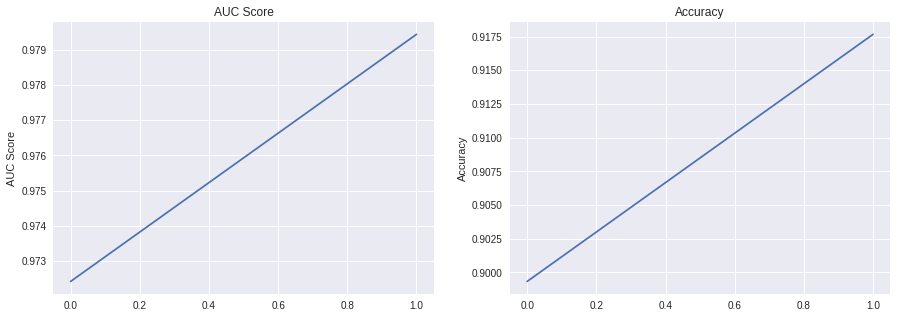

In [0]:

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 5))
p1 = fig.add_subplot(1,2,1)
p1.plot(auc_Score)
p1.set_ylabel("AUC Score")
p1.set_title("AUC Score")

p2 = fig.add_subplot(1,2,2)
p2.plot(accuracy)
p2.set_ylabel("Accuracy")
p2.set_title("Accuracy")
plt.show()